In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape
((150, 4), (150,))

((150, 4), (150,))

In [3]:
>>> X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=0)

>>> X_train.shape, y_train.shape
((90, 4), (90,))
>>> X_test.shape, y_test.shape
((60, 4), (60,))

>>> clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.9666666666666667

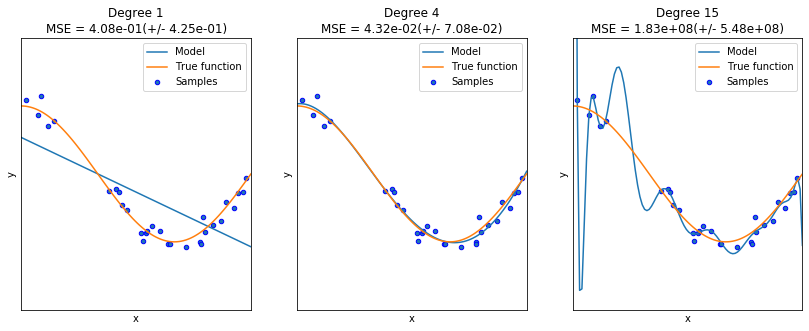

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [494]:
import numpy as np
import pandas as pd
import random
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


#load in datasets
ozone = pd.read_csv('ozone.csv', encoding = 'unicode_escape')
steelplates = pd.read_csv('steelplates.csv', encoding = 'unicode_escape')

#create lists for x and y values for training and testing data for differnt machine learning algorithms
ozone_mlp_train = []
ozone_mlp_test=[]
X_Axis=[]

steelplates_mlp_train = []
steelplates_mlp_test=[]


ozone_tree_train = []
ozone_tree_test=[]


steelplates_tree_train = []
steelplates_tree_test=[]


ozone_mlp_train_feature = []
ozone_mlp_test_feature=[]


#specify different ML algorithms
clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
clf = ExtraTreesClassifier(n_estimators=50)

#Create AOC for different datasets and ml algorithms
def edges_index(dataset, y1, y2, mlAlgo):
    frac=.1
    clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
    clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
    
    for i in range(9):
        new_dataset = dataset.sample(n=round(frac*len(dataset)), random_state=1)
        y = new_dataset['Class']
        if len(dataset.columns) == len(steelplates.columns):
            X = new_dataset.iloc[:, : 28]
        else:
            X = new_dataset.iloc[:,:-1]
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9,test_size=0.1, random_state=1)
        mlAlgo = mlAlgo.fit(X_train, y_train)
        y_pred =  mlAlgo.predict(X_test)
        y1.append(accuracy_score(y_true=y_train, y_pred=mlAlgo.predict(X_train)))
        y2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
        if len(X_Axis)<9:
            X_Axis.append("{:.0%}".format(round(frac,2)))
        frac = frac+.1
        
        

edges_index(ozone, ozone_mlp_train, ozone_mlp_test, clf_mlp)
edges_index(steelplates, steelplates_mlp_train, steelplates_mlp_test, clf_mlp)
edges_index(ozone, ozone_tree_train, ozone_tree_test, clf_tree)
edges_index(steelplates, steelplates_tree_train, steelplates_tree_test, clf_tree)
        
        


#same thing as above but with feature selection of extra trees classifier        
        
ozone_mlp_train_x_trees = []
ozone_mlp_test_x_trees=[]

steelplates_mlp_train_x_trees = []
steelplates_mlp_test_x_trees= []


ozone_tree_train_x_trees = []
ozone_tree_test_x_trees =[]


steelplates_tree_train_x_trees = []
steelplates_tree_test_x_trees= []


ozone_mlp_train_feature_x_trees = []
ozone_mlp_test_feature_x_trees =[]


        
def edges_index_x_trees(dataset, y1, y2, mlAlgo):
    frac=.1 
    clf_mlp = MLPClassifier(activation="logistic", solver="adam", alpha=1e-5, hidden_layer_sizes=(15,10), random_state=1,max_iter=1000,learning_rate_init=.1,verbose=False)
    clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
 
    
    for i in range(9):
        new_dataset = dataset.sample(n=round(frac*len(dataset)), random_state=1)
        y = new_dataset['Class']
        if len(dataset.columns) == len(steelplates.columns):
            X = new_dataset.iloc[:, : 28]
        else:
            X = new_dataset.iloc[:,:-1]

        clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
        clf = clf.fit(X, y)
        clf.feature_importances_
        model = SelectFromModel(clf, prefit=True)
        X_new = model.transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.9,test_size=0.1, random_state=1)
        mlAlgo = mlAlgo.fit(X_train, y_train)
        y_pred =  mlAlgo.predict(X_test)
        y1.append(accuracy_score(y_true=y_train, y_pred=mlAlgo.predict(X_train)))
        y2.append(accuracy_score(y_true=y_test, y_pred=y_pred))
        frac = frac+.1
        
        


    




edges_index_x_trees(ozone, ozone_mlp_train_x_trees, ozone_mlp_test_x_trees, clf_mlp)
edges_index_x_trees(steelplates, steelplates_mlp_train_x_trees, steelplates_mlp_test_x_trees, clf_mlp)
edges_index_x_trees(ozone, ozone_tree_train_x_trees, ozone_tree_test_x_trees, clf_tree)
edges_index_x_trees(steelplates, steelplates_tree_train_x_trees, steelplates_tree_test_x_trees, clf_tree)


# print(ozone_mlp_train)
# print(ozone_mlp_test)
# print(X_Axis)


# print(steelplates_mlp_train)
# print(steelplates_mlp_test)



# print(ozone_tree_train)
# print(ozone_tree_test)



# print(steelplates_tree_train)
# print(steelplates_tree_test)


print(ozone_mlp_train_x_trees)
print(ozone_mlp_test_x_trees)





[0.9251101321585903, 0.9342105263157895, 0.9385964912280702, 0.9331140350877193, 0.9307017543859649, 0.9327485380116959, 0.9373433583959899, 0.9342105263157895, 0.9346978557504874]
[0.8461538461538461, 0.9215686274509803, 0.9210526315789473, 0.9411764705882353, 0.952755905511811, 0.9013157894736842, 0.898876404494382, 0.9310344827586207, 0.9475982532751092]


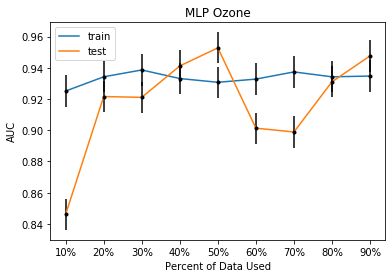

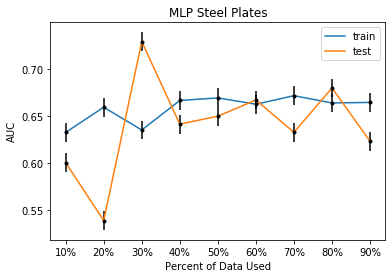

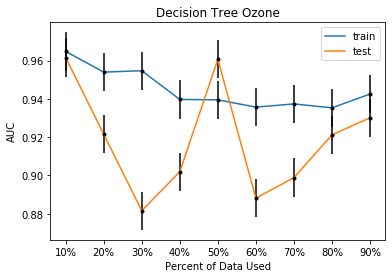

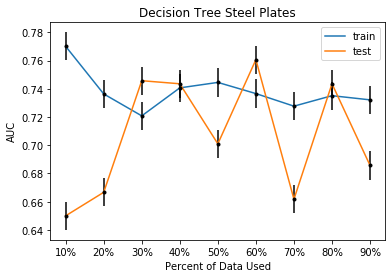

In [495]:
import matplotlib.pyplot as plt

#plot graphs
plt.plot(X_Axis, ozone_mlp_train, label="train")
plt.plot(X_Axis, ozone_mlp_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Ozone')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_mlp_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_mlp_test, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_mlp_train, label="train")
plt.plot(X_Axis, steelplates_mlp_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Steel Plates')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_mlp_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_mlp_test, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, ozone_tree_train, label="train")
plt.plot(X_Axis, ozone_tree_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Ozone')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_tree_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_tree_test, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_tree_train, label="train")
plt.plot(X_Axis, steelplates_tree_test, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Steel Plates')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_tree_train, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_tree_test, yerr=.01, fmt='.k')
plt.show()




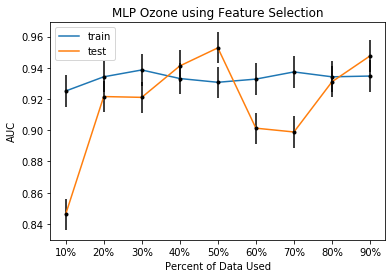

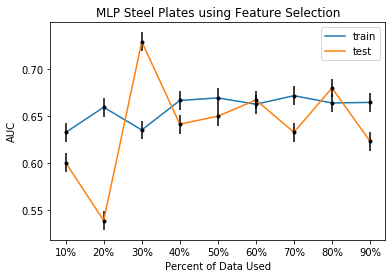

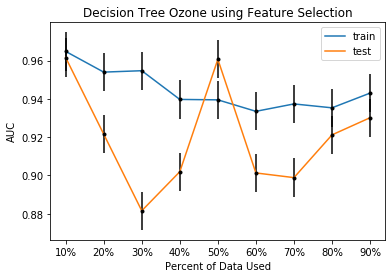

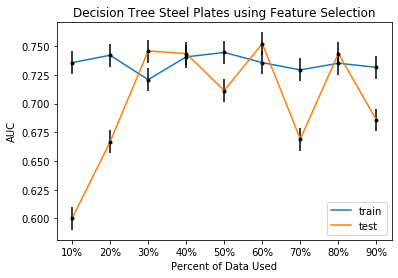

In [496]:
plt.plot(X_Axis, ozone_mlp_train_x_trees, label="train")
plt.plot(X_Axis, ozone_mlp_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Ozone using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_mlp_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_mlp_test_x_trees, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_mlp_train_x_trees, label="train")
plt.plot(X_Axis, steelplates_mlp_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('MLP Steel Plates using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_mlp_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_mlp_test_x_trees, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, ozone_tree_train_x_trees, label="train")
plt.plot(X_Axis, ozone_tree_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Ozone using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, ozone_tree_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, ozone_tree_test_x_trees, yerr=.01, fmt='.k')
plt.show()


plt.plot(X_Axis, steelplates_tree_train_x_trees, label="train")
plt.plot(X_Axis, steelplates_tree_test_x_trees, label="test")
plt.legend()
plt.xlabel('Percent of Data Used')
plt.title('Decision Tree Steel Plates using Feature Selection')
plt.ylabel('AUC')
plt.errorbar(X_Axis, steelplates_tree_train_x_trees, yerr=.01, fmt='.k')
plt.errorbar(X_Axis, steelplates_tree_test_x_trees, yerr=.01, fmt='.k')
plt.show()


In [532]:
from scipy import stats
from sklearn import svm, datasets

# stats.gmean(steelplates['V5'])


random_state = np.random.RandomState(0)
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)



y_score = classifier.decision_function(X_test)


from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.67


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [543]:
from sklearn import svm
from sklearn import metrics

X = steelplates.iloc[:, : 28]
y = steelplates['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf = svm.SVC(kernel='rbf', gamma=0.7, C = 1.0).fit(X_train, y_train)
y_predicted = clf.predict(X_test)



# performance
print ("Classification report for %s" % clf)
print (metrics.classification_report(y_test, y_predicted))

print (metrics.confusion_matrix(y_test, y_predicted))

Classification report for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           1       0.68      1.00      0.81       132
           2       0.00      0.00      0.00        63

    accuracy                           0.68       195
   macro avg       0.34      0.50      0.40       195
weighted avg       0.46      0.68      0.55       195

[[132   0]
 [ 63   0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [547]:
sum(steelplates_mlp_test)/9

0.6399054672310163